In [2]:
from src.Time_Series_Helper_Funcs import *
from src.Regression_Helper_Funcs import *
from src.ARIMA_Helper_Funcs import *
from src.Prep_Class import *
from src.Model import *
import warnings
warnings.filterwarnings('ignore')

/Users/jenniferpaige/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/jenniferpaige/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/jenniferpaige/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.preprocessing.labe

SyntaxError: invalid syntax (Model.py, line 57)

In [2]:
%load_ext autoreload
%reload_ext autoreload

In [3]:
%autoreload

In [4]:
df = Prep(files).compile()

------------------------------------PREP------------------------------------
 1 of 12 |    Reading in data 
         |    Filtering to 5 features:
         |       Date, System Size, Total Cost, Customer Segment, State 
         |    Changing -9999 values to null
 2 of 12 |    Cleaning up column names
 3 of 12 |    Refining to only RES Customer Segment
 4 of 12 |    Sorting values by installation_date
         |    Assigning installation_date as index
 5 of 12 |    Replacing all null values with median values from same year
 6 of 12 |    Adusting prices for inflation
 7 of 12 |    Creating target variable: cost_per_watt
 8 of 12 |    Removing outliers above $25 per watt
 9 of 12 |    Resampling data into weekly medians
         |    Cropping dataframe to keep only continuous non-null data
10 of 12 |    Testing for stationarity
         |       ADF P-value: 0.9654 
         |       Time Series is not stationary.   
         |       Fail to reject ADF H0
11 of 12 |    Creating difference

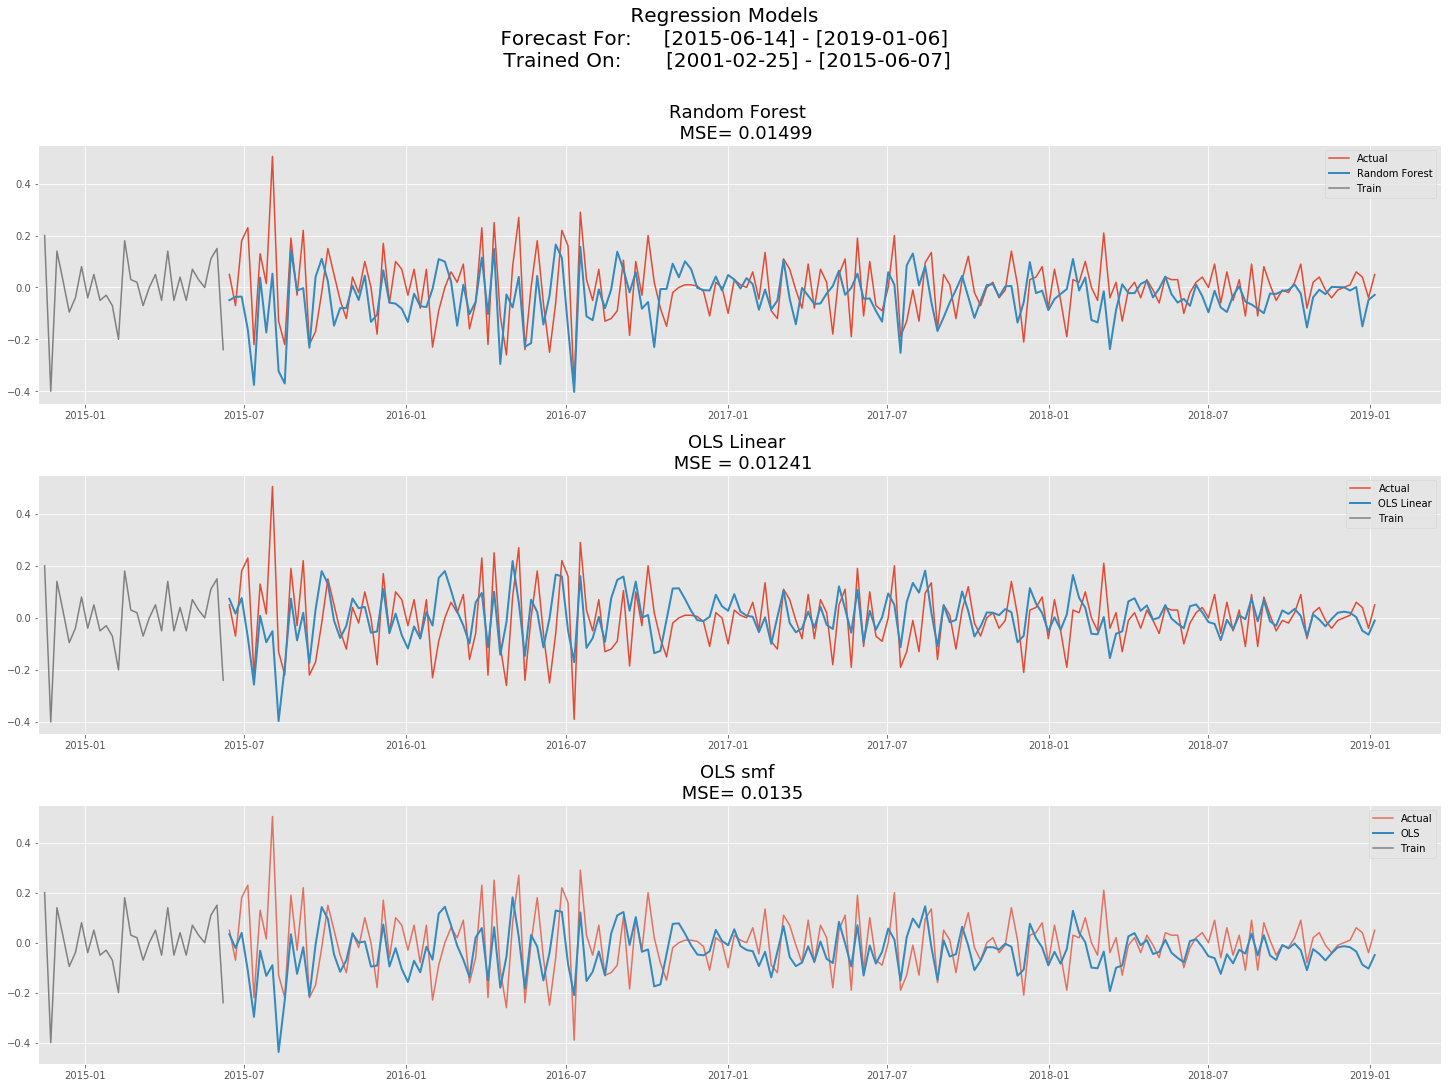

In [5]:
regression(df)

In [7]:
arima_order_mses(df)

ARIMA(0, 0, 0) MSE=0.0144
ARIMA(0, 0, 1) MSE=0.0190
ARIMA(0, 0, 2) MSE=0.0186
ARIMA(0, 0, 3) MSE=0.0183
ARIMA(0, 1, 0) MSE=0.0378
ARIMA(0, 1, 1) MSE=0.0146
ARIMA(0, 1, 2) MSE=0.0192
ARIMA(0, 1, 3) MSE=0.0185
ARIMA(0, 2, 0) MSE=0.1171
ARIMA(0, 2, 1) MSE=0.0380
ARIMA(0, 2, 2) MSE=0.0185
ARIMA(0, 2, 3) MSE=0.0187
ARIMA(1, 0, 0) MSE=0.0136
ARIMA(1, 0, 1) MSE=0.0186
ARIMA(1, 0, 2) MSE=0.0185
ARIMA(1, 0, 3) MSE=0.0181
ARIMA(1, 1, 0) MSE=0.0272
ARIMA(1, 1, 3) MSE=0.0202
ARIMA(1, 2, 0) MSE=0.0671
ARIMA(2, 0, 0) MSE=0.0137
ARIMA(2, 0, 1) MSE=0.0183
ARIMA(2, 0, 2) MSE=0.0179
ARIMA(2, 0, 3) MSE=0.0194
ARIMA(2, 1, 0) MSE=0.0228
ARIMA(2, 1, 1) MSE=0.0137
ARIMA(2, 2, 0) MSE=0.0489
ARIMA(4, 0, 0) MSE=0.0138
ARIMA(4, 0, 1) MSE=0.0180
ARIMA(4, 0, 2) MSE=0.0195
ARIMA(4, 0, 3) MSE=0.0169
ARIMA(4, 1, 0) MSE=0.0171
ARIMA(4, 1, 1) MSE=0.0136
ARIMA(4, 2, 0) MSE=0.0343
ARIMA(5, 0, 0) MSE=0.0157
ARIMA(5, 0, 1) MSE=0.0154
ARIMA(5, 0, 2) MSE=0.0153
ARIMA(5, 0, 3) MSE=0.0172
ARIMA(5, 1, 0) MSE=0.0159
ARIMA(5, 1, 

In [ ]:
basic_auto = auto_arima(df).order
inv_auto = auto_arima(df, trace=False,seasonal=False, stationary=True, stepwise=False, out_of_sample_size=round(len(diff)*.2), n_job= -1, max_order=12).order
long_arima = arima_order_mses(df)

In [ ]:
arima_orders = [(5,0,5),(0,0,1), (4,0,0), (6,0,4)]

In [ ]:
ARIMA_predict(df,(10,1,1))

In [ ]:
ARIMA_predict(df,(6,0,3))

In [ ]:
for i in arima_orders:
    ARIMA_predict(df, i)

In [ ]:
narx_gs(df)

In [ ]:
narx(df)